In [3]:
import pandas as pd
from sklearn import tree
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [4]:
data = pd.read_csv('regressive-210418-184638.csv')

In [5]:
data.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [7]:
data = pd.get_dummies(data, columns = ['3D_available','Genre'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           494 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [9]:
data

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_NO,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,223.840,23,494,48000,0,1,0,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,243.456,42,462,43200,1,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,2022.400,38,458,69400,1,0,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,225.344,45,472,66800,0,1,0,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,225.792,55,395,72400,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,...,243.584,27,561,44800,1,0,1,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,...,263.296,20,600,41200,0,1,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,...,243.824,31,576,47800,1,0,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,...,303.520,47,607,44000,0,1,0,1,0,0


In [10]:
data['Time_taken'] = data['Time_taken'].fillna(data['Time_taken'].mean())  #to fill out empty datas

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [12]:
y = data[['Collection']]    #labels

In [13]:
y

,Collection
0,48000
1,43200
2,69400
3,66800
4,72400
...,...
501,44800
502,41200
503,47800
504,44000


In [14]:
#features
x = data.drop(['Collection'],axis=1)

In [15]:
x

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_NO,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,0,1,0,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,1,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,1,0,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,0,1,0,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,...,186.96,243.584,27,561,1,0,1,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,...,132.24,263.296,20,600,0,1,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,...,109.56,243.824,31,576,1,0,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,...,158.80,303.520,47,607,0,1,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.15)

In [17]:
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth = 3)

In [18]:
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=3)

In [19]:
ypredict = model.predict(xtrain)

In [20]:
ypredict

array([ 25220.89552239,  45907.44680851,  43800.        ,  45907.44680851,
        64955.10204082,  64955.10204082,  35452.74725275,  45907.44680851,
        35452.74725275,  45907.44680851,  64955.10204082,  45907.44680851,
        45907.44680851,  25220.89552239,  45907.44680851,  64955.10204082,
        45907.44680851,  45907.44680851,  64955.10204082,  45907.44680851,
        25220.89552239,  45907.44680851,  35452.74725275,  35452.74725275,
        45907.44680851,  45907.44680851,  35452.74725275,  35452.74725275,
        35452.74725275,  25220.89552239,  25220.89552239,  35452.74725275,
        45907.44680851,  45907.44680851,  25220.89552239,  45907.44680851,
        45907.44680851,  45907.44680851,  91792.59259259,  45907.44680851,
        35452.74725275,  91792.59259259,  35452.74725275,  35452.74725275,
        35452.74725275,  91792.59259259,  45907.44680851,  45907.44680851,
        45907.44680851,  64955.10204082,  45907.44680851,  25220.89552239,
        25220.89552239,  

In [21]:

pip install graphviz

  Using cached graphviz-0.17-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install pydotplus


  Using cached pydotplus-2.0.2.tar.gz (278 kB)
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=14aeb3f7b9cb90f770cd0e69345177fb9e3bf65ed66e08b7be846401978ba5e4
  Stored in directory: c:\users\theja\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


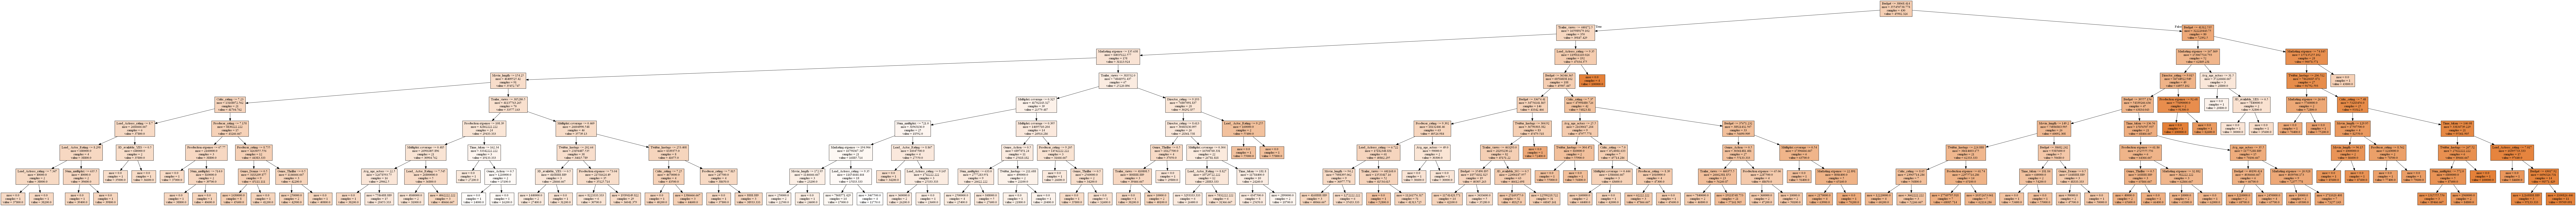

In [24]:
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image

model = tree.DecisionTreeRegressor(max_depth = 8)
model.fit(xtrain,ytrain)




dot = tree.export_graphviz(model, out_file = None,
                          feature_names = xtrain.columns,filled=True)

graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())

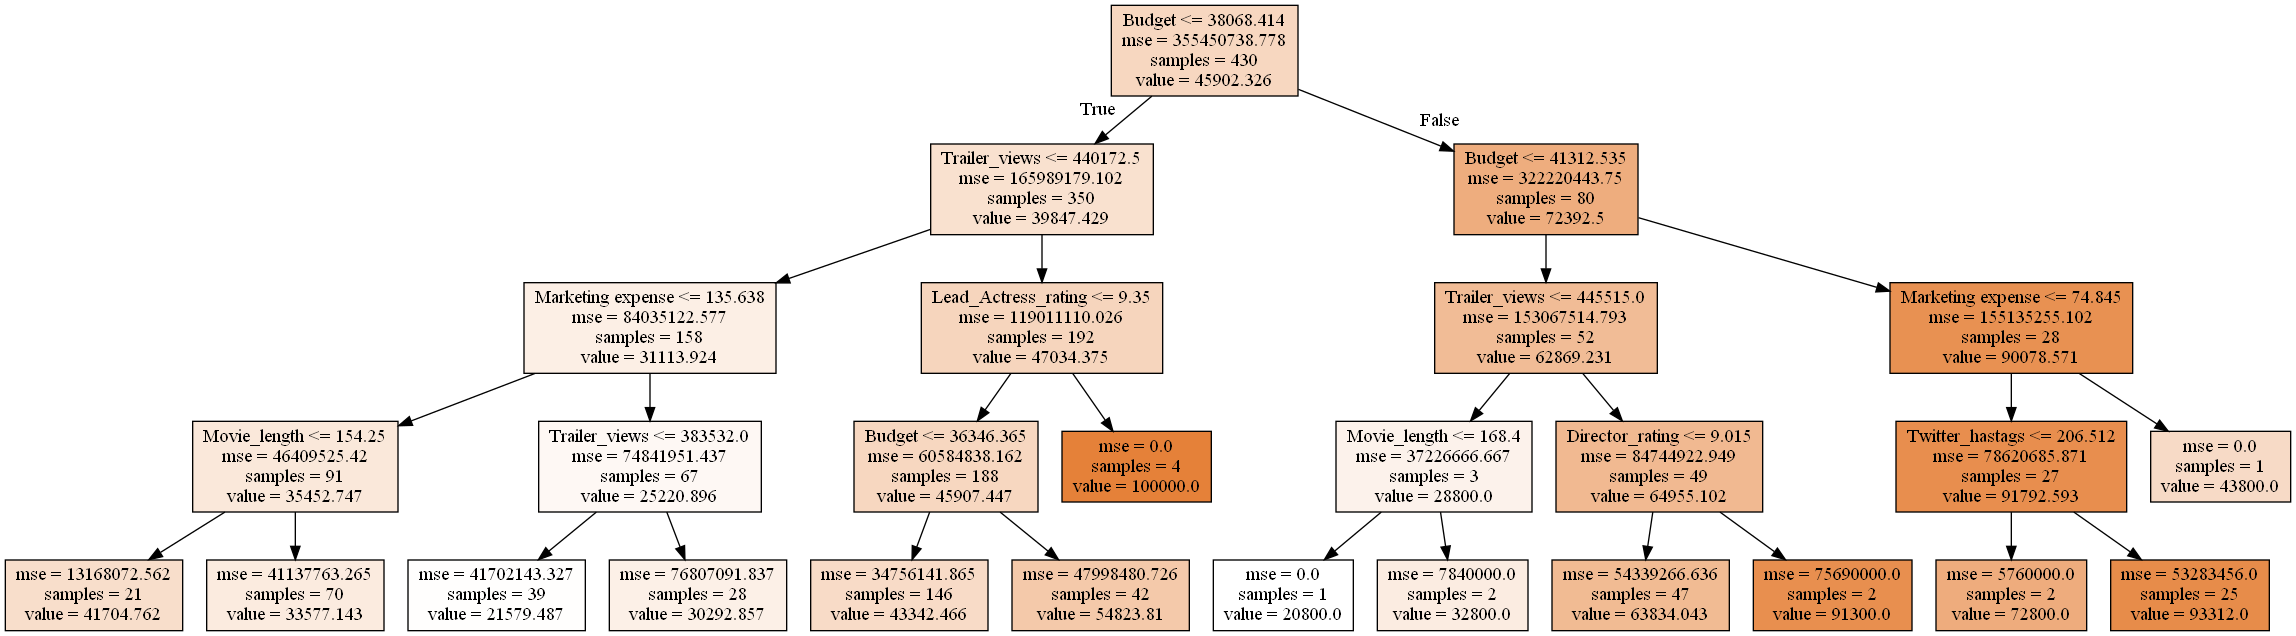

In [25]:
from sklearn import tree
import graphviz
import pydotplus
from IPython.display import Image

model = tree.DecisionTreeRegressor(max_depth = 4)
model.fit(xtrain,ytrain)




dot = tree.export_graphviz(model, out_file = None,
                          feature_names = xtrain.columns,filled=True)

graph = pydotplus.graph_from_dot_data(dot)
Image(graph.create_png())
